![logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)

> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Introduction to Support Vector Machines (SVM)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

%matplotlib inline

Create a dummy dataset

In [3]:
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                    n_redundant=0, n_classes=2,
                                    random_state=123)

Display the dimension of the data

In [4]:
X.shape, y.shape

((100, 2), (100,))

Visualizing the data

Text(0, 0.5, 'Y values')

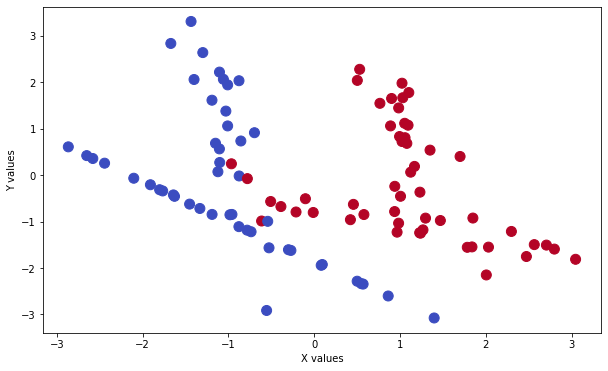

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm,s=100)
plt.xlabel('X values')
plt.ylabel('Y values')

Split the dataset into training set and test set.

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, 
                                                                    random_state=123)

Create a Linear SVM classifier.

In [7]:
params = {'kernel':'linear'}
classifier = SVC(**params, gamma='auto')

Train the classifier model.

In [8]:
classifier.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

Get the predictions.

In [9]:
predictions = classifier.predict(X_test)

Get the confusion matrix.

In [10]:
print(confusion_matrix(y_test,predictions))

[[13  2]
 [ 3 12]]


Get the accuracy score of predicted results versus ground truth labels.

In [11]:
print(metrics.accuracy_score(y_test, predictions))

0.8333333333333334


In [12]:
def plot_decision_boundary(classifier, X_test, y_test):
    
    # create a mesh to plot in
    
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.9)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=200)

Visualizing the decision boundary

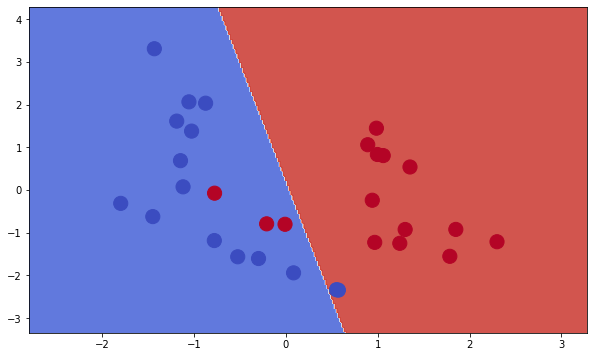

In [13]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

# Build a non-linear classifier using SVM

Create a SVM classifier that uses **RBF** kernel.

In [14]:
params = {'kernel':'rbf'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

[[15  0]
 [ 1 14]]
0.9666666666666667


The accuracy increased to 95% when we use a non-linear classifier!

Since the data has only 2 features, it is easy to plot for visualization.

You can visualize the effect of a non-linear SVM classifier on our test dataset.

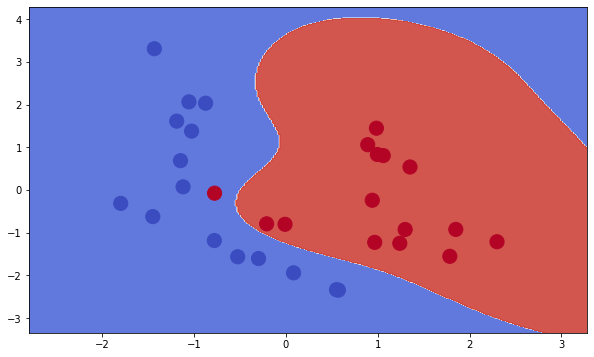

In [15]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

We can test out other non-linear SVM variants available by changing the SVM kernel and visualize the effect on our test dataset.

Create a SVM classifier that uses **polynomial** kernel.

In [16]:
params = {'kernel':'poly','degree':3}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(metrics.accuracy_score(y_test, predictions))

[[13  2]
 [ 3 12]]
0.8333333333333334


Visualize the decision boundary of the **polynomial** kernel

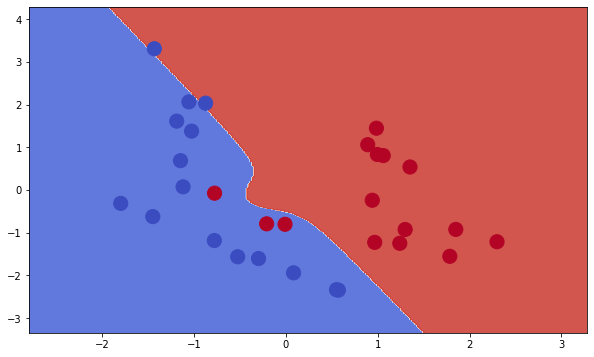

In [17]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

Create a SVM classifier that uses **sigmoid** kernel.

In [18]:
params = {'kernel':'sigmoid'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(metrics.accuracy_score(y_test, predictions))

[[11  4]
 [ 3 12]]
0.7666666666666667


Visualize the decision boundary of the **sigmoid** kernel

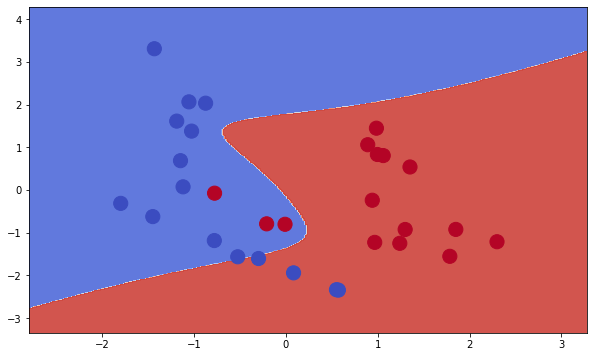

In [19]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

# Classifying IRIS dataset by using Support Vector Machine

### Load Data
Here we will load the IRIS dataset from *scikit-learn*. We will be utilizing `iris.data` and `iris.target` as usual for our features and values.

In [20]:
iris = datasets.load_iris()

As usual `dir(iris)` shows the attributes of the iris datasets.<br> 
- `iris.data.shape` shows the shape of the data.<br>
- `iris.target_names` shows the classes that we want to classify.<br>
- `iris.feature_names` shows the name of features that we are training.

In [21]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [22]:
iris.data.shape

(150, 4)

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The respective integer values assigned for the output(y) for training

In [25]:
np.unique(iris.target)

array([0, 1, 2])

In [26]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
data = iris.data.astype(np.float32)
target = iris.target.astype(np.float32)

In [28]:
print(len(data))
print(len(target))

150
150


Splitting the data into training and test set

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, 
                                                                    target, 
                                                                    test_size=0.3, 
                                                                    random_state=123)

In [30]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [31]:
X_test.shape, y_test.shape

((45, 4), (45,))

Declaring the parameters for the SVM

In [32]:
params = {'kernel':'linear'}
classifier = SVC(**params, gamma='auto')

Train the classifier.

In [33]:
classifier.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

Get the predictions.

In [34]:
predictions = classifier.predict(X_test)

Visualizing the confusion matrix and accuracy

In [35]:
print(confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]


In [36]:
print(metrics.accuracy_score(y_test, predictions))

0.9555555555555556


Use SVM with **non-linear** kernels to perform classification.

Check with Polynomial, RBF then Sigmoid kernels.

In [37]:
poly_params = {'kernel':'poly', 'degree':3}
rbf_params = {'kernel':'rbf'}
sigmoid_params = {'kernel':'sigmoid'}

params_list = [poly_params, rbf_params, sigmoid_params]

Use for loop to train models with different kernels

In [38]:
for params in params_list:
    
    classifier = SVC(**params, gamma='auto')
    classifier.fit(X_train, y_train)
    
    predictions = classifier.predict(X_test)
    
    print("Kernel: " + params['kernel'])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Accuracy:")
    print(metrics.accuracy_score(y_test, predictions))
    print("")

Kernel: poly
Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]
Accuracy:
0.9777777777777777

Kernel: rbf
Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]
Accuracy:
0.9777777777777777

Kernel: sigmoid
Confusion Matrix:
[[ 0 18  0]
 [ 0 10  0]
 [ 0 17  0]]
Accuracy:
0.2222222222222222



As you can see the rbf and polynomial kernels, slightly improve the accuracy score because the IRIS dataset that we use is almost linearly separable. Sigmoid kernel does not perform well for this dataset.